### Data cleaning

Images have been already converted (compressed) from raw NEF files to JPG files.

In [79]:
# Importing libraries needed
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image, ImageStat
import re
import numpy as np

In [80]:
# Directory of the pan examples to find the best cropping values
DIR = 'pan/'

In [84]:
# Creating the cropping range (of height as percent) based on camera pan 
cropping_range = {
    '120' : (25, 48),
    '175' : (35, 0),
    '205' : (30, 0),
    '206' : (30, 0),
    '210' : (30, 0),
    '220' : (30, 15),
    '224' : (30, 25),
    '225' : (30, 25),
    '230' : (25, 50)
}

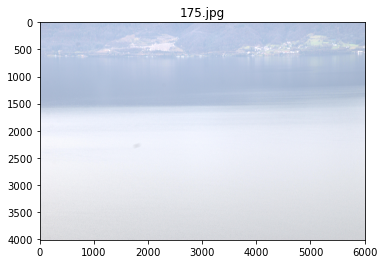

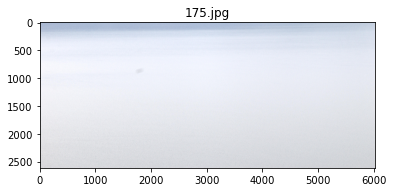

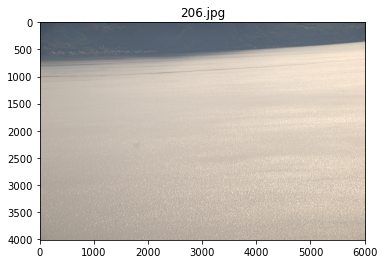

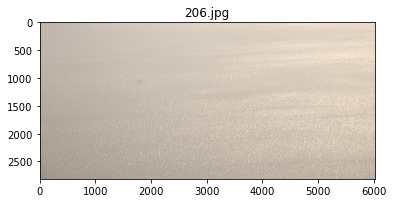

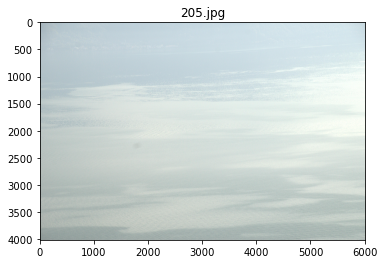

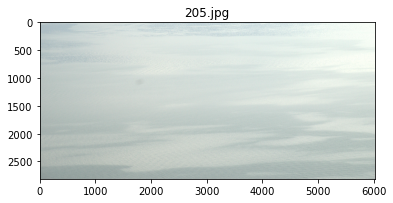

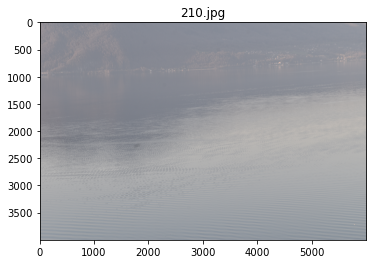

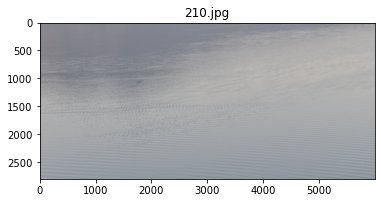

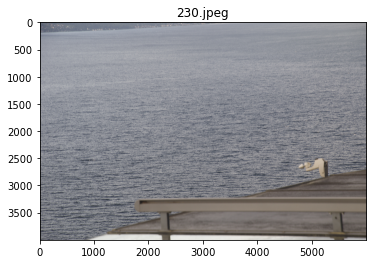

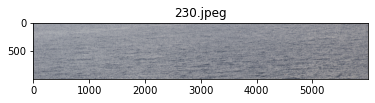

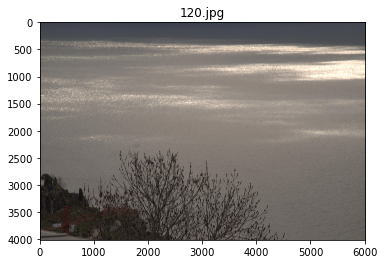

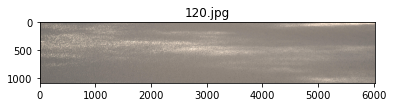

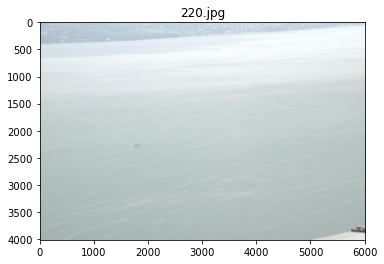

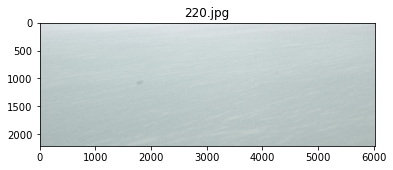

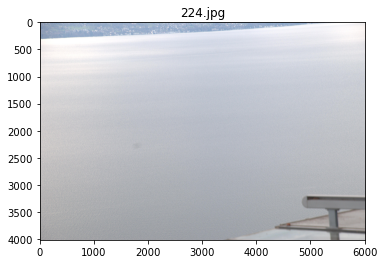

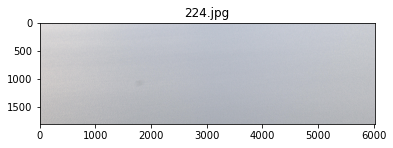

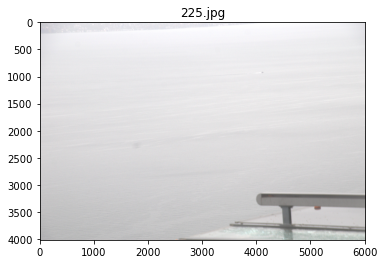

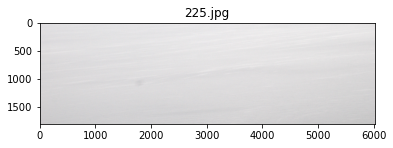

In [85]:
for image in os.listdir(DIR):
    impath = os.path.join(DIR, image)
    if not impath.endswith('.jpg') and not impath.endswith('.jpeg'):
        continue

    img = Image.open(impath)
    
    # Get the pan from image name and find the optimal cropping range
    top, bottom = cropping_range[image.split('.')[0]]
    
    # Crop the image
    w, h = img.size
    img1 = img.crop((0, int(h*top/100), w, h - int(h*bottom/100)))
    
    # Display the original and the cropped image to confirm the ranges
    plt.title(image)
    plt.imshow(img)
    plt.show()
    plt.title(image)
    plt.imshow(img1)
    plt.show()

In [86]:
# Regex for parsing text file with camera pan and tilt settings
date_regex = r'(\d{4}-\d{2}-\d{2})'
pan_tilt_regex = r'pan=\[(\d+)\], tilt=\[(\d+)\]'

In [87]:
date_pans_tilts = {}
with open('_LOG_dates.txt', 'r') as camera_file:
    for line in camera_file:
            date_result = re.search(date_regex, line)
            pan_tilt_result = re.search(pan_tilt_regex, line)
            
            # Skip days without available data or multiple pans/tilts
            if not date_result or not pan_tilt_result:
                continue
            
            # Save pan and tilt settings for each day
            date = date_result.group(1)
            pan = int(pan_tilt_result.group(1))
            tilt = int(pan_tilt_result.group(2))
            date_pans_tilts[date] = {'pan':pan, 'tilt':tilt}

In [88]:
CHUNK_ROOT = './'
DATASET_DIR = './dataset/'

In [89]:
def crop_pan(img, date, cropping_range):
    # Get the pan value based on the date and crop the image using the optimal range for that pan
    pan = date_pans_tilts[date]['pan']
    top, bottom = cropping_range[str(pan)]
    w, h = img.size
    return img.crop((0, int(h*top/100), w, h - int(h*bottom/100)))

In [90]:
def resize(img, width=600):
    # Resize the image to the given height, keeping the aspect ratio
    w, h = img.size
    new_w = width
    new_h = int(h*new_w/w)
    return img.resize((new_w, new_h), Image.ANTIALIAS)

In [91]:
def is_dark(img, dark_threshold):
    # Check whether the mean is dark i.e. its norm of the mean
    # color is less than the given threshold
    stat = ImageStat.Stat(img_resized)
    dark_sum = np.linalg.norm(stat.mean)
    return dark_sum < dark_threshold

In [100]:
# Images were converted from NEF to JPG in chunks, get all of the chunk directories
chunk_dirs = filter(lambda dir:dir.startswith('chunk'), os.listdir(CHUNK_ROOT))
sorted_dirs = sorted(chunk_dirs, key=lambda d:int(d.replace('chunk','')))

for chunk_dir in sorted_dirs:
    print('Starting', chunk_dir)
    dir_path = os.path.join(CHUNK_ROOT, chunk_dir)
    for image in os.listdir(dir_path):
        # Skip files other than images (e.g. hidden system files)
        if not image.endswith('jpeg'):
            continue
        
        # Do not take the images from days with invalid pan/tilt settings
        date = image[0:10]
        if not date in date_pans_tilts:
            continue
        
        # Open, crop and resize image
        image_path = os.path.join(dir_path, image)
        img_loaded = Image.open(image_path)
        img_cropped = crop_pan(img_loaded, date, cropping_range)
        img_resized = resize(img_cropped)
        
        # Remove images during night (threshold = 100)
        if is_dark(img_resized, dark_threshold=100):
            continue
        
        # Save the final image
        img_resized.save(os.path.join(DATASET_DIR, image), quality=90, optimize=True)

Starting chunk0
Starting chunk1
Starting chunk2
Starting chunk3
Starting chunk4
Starting chunk5
Starting chunk6
Starting chunk7
Starting chunk8
Starting chunk9
Starting chunk10
Starting chunk11
Starting chunk12
Starting chunk13
Starting chunk14
Starting chunk15
Starting chunk16
Starting chunk17
Starting chunk18
Starting chunk19
Starting chunk20
Starting chunk21
Starting chunk22
Starting chunk23
Starting chunk24
Starting chunk25
Starting chunk26
Starting chunk27
Starting chunk28
Starting chunk29
Starting chunk30
Starting chunk31
Starting chunk32
Starting chunk33
Starting chunk34
Starting chunk35
Starting chunk36
Starting chunk37
Starting chunk38
Starting chunk39
Starting chunk40
Starting chunk41
Starting chunk42
Starting chunk43
Starting chunk44
Starting chunk45
Starting chunk46
Starting chunk47
Starting chunk48
Starting chunk49
Starting chunk50
Starting chunk51
Starting chunk52
Starting chunk53
Starting chunk54
Starting chunk55
Starting chunk56
Starting chunk57
Starting chunk58
Startin